In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from random import random, sample, randint
#%matplotlib inline

In [81]:
def GraficaPoblacion(P,gen = False,function = None):
    #Gráficas de curvas de nivel

    X = np.linspace(-5,5,100)
    Y = np.linspace(-5,5,100)
    X, Y = np.meshgrid(X, Y)
    Z = getFunction(X,Y,function)
    
    plt.clf()
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y, Z, 50, cmap='binary')
    plt.clabel(ax, inline=1, fontsize=10)
    plt.title('Poblacion')


def getFunction(X,Y,function = None):
    if function == 1 : #Funcion de De Jong
        Z = X**2 + Y**2

    elif function == 2: #Funcion: Rosenbrock's Valley
        Z = 100*(Y-X**2)**2 + (1-X)**2 
        
    elif function == 3: #Funcion de Rastrigin
        Z = 20+X**2+Y**2-10*np.cos(2*np.pi*X)-10*np.cos(2*np.pi*Y)
        
    elif function == 4: #Funcion de Schwefel
        Z=-X*np.sin(np.sqrt(np.abs(X)-Y*np.sin(np.sqrt(np.abs(Y))))) 
    elif function == 5:
        Z= ((X**2 + Y**2)/4000) - np.cos(X)*np.cos(Y/np.sqrt(2)) + 1
    elif function == 6:
        Z=-X*np.sin(np.sqrt(np.abs(X))-Y*np.sin(np.sqrt(np.abs(Y)))) 
    
    return Z
    
def GraficaPoblaciones(Ps, gen = False):
    #Gráficas de curvas de nivel
    plt.clf()
    #fig = plt.figure()
    #ax = fig.add_subplot(111, projection='3d')
    X = np.linspace(-10,10,100)
    Y = np.linspace(-10,10,100)
    X, Y = np.meshgrid(X, Y)
    Z = 20+X**2+Y**2-10*np.cos(2*np.pi*X)-10*np.cos(2*np.pi*Y)
    CS = plt.contour(X, Y, Z,alpha=0.75)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.title('Poblacion')

    #grafica la población
    cols = ['r','b','g','k']
    for i,P in enumerate(Ps):
        if gen:
            for I in P:
                [x1,x2] = I[0],I[1]
                plt.scatter(x1,x2,s=30,c=cols[i%4])    
        else:
            for I in P:
                [x1,x2] = Ind2Number(I,v_min,v_max,n_var,n_bits)
                plt.scatter(x1,x2,s=30,c=cols[i%4])    
    plt.show()

In [2]:
def IniciaPob(N,n_var,n_bits):
    Pob = []
    for i in range(N):
        I = ''
        for v in range(n_var):
            for b in range(n_bits):
                I = I+sample(['0','1'],1)[0]
        Pob.append(I)
    return Pob

In [3]:
def Ind2Number(I, v_min, v_max, n_vars, n_bits):        
    numb = []
    for i in range(n_vars):
        cod_v = I[i*n_bits:(i+1)*n_bits]
        d_i = int(cod_v,2)
        val = v_min[i]+d_i*(v_max[i]-v_min[i])/float(2**n_bits-1)
        numb.append(val)
    return numb        

In [4]:
def Convert_Poblation(P0,v_min,v_max,n_vars,n_bits):
    pop = []
    for item in P0:
        pop.append(Ind2Number(item,v_min,v_max,n_vars,n_bits))
    return pop
    

In [7]:
N = 10
n_bits = 4
n_var = 2
v_min = [-5,-5]
v_max = [5,5] 

P0 = IniciaPob(N,n_var,n_bits)
P0_Gen = Convert_Poblation(P0,v_min,v_max,n_var,n_bits)
P0_Gen

[[0.33333333333333304, 3.666666666666666],
 [1.666666666666667, 2.333333333333333],
 [-1.0, 1.0],
 [-0.33333333333333304, -5.0],
 [-3.0, -5.0],
 [5.0, 0.33333333333333304],
 [-3.0, -0.33333333333333304],
 [-4.333333333333333, -3.0],
 [4.333333333333334, -0.33333333333333304],
 [-0.33333333333333304, 1.666666666666667]]

In [11]:
def Aptitude(I,gen = False):
    if gen:
        [x1,x2] = I[0],I[1]
    else:
        [x1,x2] = Ind2Number(I,v_min,v_max,n_var,n_bits)
        
    r = 20+x1**2+x2**2-10*np.cos(2*np.pi*x1)-10*np.cos(2*np.pi*x2)
    return 1.0/(1.0+0.1*r)

In [8]:
def Evo(parents,child_size,ro):
    childs = []
    for i in range(child_size):
        p = np.array(sample(parents,ro))
        childs.append([np.sum(p[:,0])/len(p),np.sum(p[:,1])/len(p)])
    return childs

Gen_Childs = Evo(P0_Gen,len(P0_Gen)+20,5)
Gen_Childs

[[1.8000000000000003, -2.1999999999999997],
 [-0.06666666666666651, -1.5333333333333332],
 [1.1333333333333333, -2.333333333333333],
 [2.2, -3.8],
 [-0.4666666666666668, -2.333333333333333],
 [0.7333333333333335, -2.7333333333333334],
 [0.4666666666666668, -2.333333333333333],
 [0.33333333333333337, -1.9333333333333331],
 [1.8000000000000003, -2.4666666666666663],
 [0.06666666666666661, -1.533333333333333],
 [2.2, -3.8],
 [0.4666666666666668, -2.333333333333333],
 [0.8666666666666668, -2.8666666666666663],
 [2.0666666666666673, -3.4],
 [0.06666666666666687, -0.9999999999999998],
 [-0.0666666666666667, -2.2],
 [1.4000000000000001, -2.333333333333333],
 [1.4, -1.6666666666666665],
 [1.4, -3.2666666666666666],
 [0.33333333333333337, -1.933333333333333],
 [-0.2, -1.8],
 [0.33333333333333337, -0.9999999999999997],
 [0.4666666666666666, -1.6666666666666665],
 [0.06666666666666661, -1.6666666666666665],
 [-0.2000000000000001, -1.8],
 [1.1333333333333333, -3.1333333333333337],
 [1.8, -2.2],
 [

In [9]:
def Mutacion(P,sd):
    mutatedChilds = []
    for i in P:
        mutatedChilds.append([i[0]+np.random.normal(loc = 0,scale=sd),i[1]+np.random.normal(loc = 0,scale=sd)])
    return mutatedChilds

Gen_Childs = Mutacion(Gen_Childs,.5)
Gen_Childs

[[2.078054787821156, -2.0212231571192145],
 [0.019520165058446948, -1.3466092029927246],
 [0.5087587465172162, -2.186815078090205],
 [2.686652496830941, -3.3293334978401936],
 [-0.19466644521731524, -2.5807478490326656],
 [1.1076986765910815, -2.3238904686377846],
 [0.4619849765848908, -2.3769003339895534],
 [1.1162152165174848, -2.1237677798361876],
 [1.932617112052528, -3.109391775896312],
 [-0.3005051539088388, -1.7972475060852635],
 [2.2743550621294, -3.8429408685834785],
 [1.0677374994785502, -1.8251404448941029],
 [0.564161183212915, -2.1446170175087165],
 [0.9836785224576836, -2.554924403832384],
 [0.6072762116190794, -0.5071807345641433],
 [0.2612629179153039, -2.866867972098541],
 [2.6834801016300105, -2.1976128830823165],
 [0.991315620402103, -1.1372696940213718],
 [1.075873435799839, -2.3621838318138955],
 [0.7771570870628242, -2.6390794957276262],
 [-0.11477825017898945, -1.3939205996002741],
 [0.19435565555866513, -0.8396618374507285],
 [1.6646933949312526, -1.156848123940

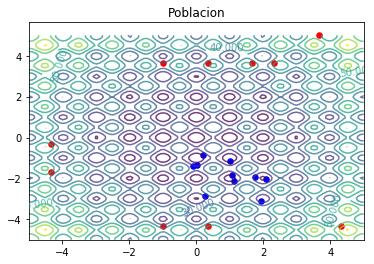

In [18]:
def Seleccion(P,N):
    selected = []
    aptitudes = []
    newGen = []
    
    for i in P:
        aptitudes.append(np.array([i[0],i[1],Aptitude(i,True)]))
    aptitudes = sorted(aptitudes,key= lambda x: x[2],reverse=True)
    
    for new in aptitudes[:10]:
        newGen.append([new[0],new[1]])
    
    return newGen

newGen = Seleccion(Gen_Childs,N)

GraficaPoblaciones([P0_Gen,newGen],True)

<Figure size 432x288 with 0 Axes>

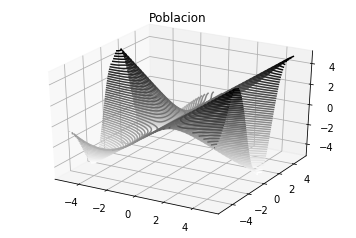

In [83]:
GraficaPoblacion(P0,function = 6)